<a href="https://colab.research.google.com/github/Ilu27/Web-Scraping-Linkedin-Job-Platform-.ipynb/blob/main/Web_Scraping(Linkedin_Job).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the neccessary libraries
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd

In [2]:
#connecting to the website
url = requests.get('https://www.linkedin.com/jobs/search/?currentJobId=3799298859&geoId=102713980&keywords=data%20science&location=India&origin=JOB_SEARCH_PAGE_KEYWORD_AUTOCOMPLETE&refresh=true')
#parsing and printing out the webpage html
webpage =bs(url.content,'html.parser')
webpage


<!DOCTYPE html>

<html lang="en">
<head>
<meta content="d_jobs_guest_search" name="pageKey"/>
<!-- --> <meta content="urlType=jserp_custom;emptyResult=false" name="linkedin:pageTag"/>
<meta content="en_US" name="locale"/>
<meta data-app-version="2.0.1456" data-browser-id="e4ae1774-2a1d-4b2d-81c9-0fd9fde411bd" data-call-tree-id="AAYOrZ308TsgTonmRIddog==" data-disable-jsbeacon-pagekey-suffix="false" data-enable-page-view-heartbeat-tracking="" data-member-id="0" data-multiproduct-name="jobs-guest-frontend" data-page-instance="urn:li:page:d_jobs_guest_search;2x5KJ+WOQnGOZ8xUpW1BpQ==" data-service-name="jobs-guest-frontend" id="config"/>
<link href="https://in.linkedin.com/jobs/data-science-jobs" rel="canonical"/>
<!-- --><!-- -->
<!-- -->
<!-- -->
<!-- -->
<!-- -->
<link href="https://static.licdn.com/aero-v1/sc/h/al2o9zrvru7aqj8e1x2rzsrca" rel="icon"/>
<script>
          function getDfd() {let yFn,nFn;const p=new Promise(function(y, n){yFn=y;nFn=n;});p.resolve=yFn;p.reject=nFn;return p;}


In [3]:
job_lists = webpage.find('ul', class_='jobs-search__results-list')
job = job_lists.find_all("li")
job_description = []
for i in job:
    # Find the nested div with class 'base-search-card__info'
    job_info_div = i.find('div', class_='base-search-card__info')

    current_row = []

    if job_info_div:
        # Extract job title from <h3> tag
        job_title = job_info_div.find('h3').text.strip()
        current_row.append(job_title)

        # Extract company name from <h4> tag
        company_name = job_info_div.find('h4').text.strip()
        current_row.append(company_name)

        # Extract date from <time> tag
        date_tag = job_info_div.find('time')
        job_date_posted = date_tag['datetime']
        current_row.append(job_date_posted)

        job_description.append(current_row)

print(job_description)

[['Junior Data Scientist', 'Prescience Decision Solutions', '2024-01-11'], ['python developer, data science, ML, AI, freshers, Django', 'AMAR TECHNOLABS PRIVATE LIMITED', '2024-01-11'], ['Data Research Analyst', 'Forbes Advisor', '2024-01-10'], ['Data Science - Internship', 'Hypersonix Inc.', '2023-12-16'], ['Data Analyst', 'BharatX', '2023-12-15'], ['Data Science', 'NIRA', '2023-07-13'], ['ML Engineers_ Bangalore, Noida, Pune, Nagpur_ Deepanshi', 'CodersBrain', '2023-12-29'], ['Data Science Internship', 'Acceron', '2023-11-04'], ['ML Engineers_ Bangalore, Noida, Pune, Nagpur_ Deepanshi', 'CodersBrain', '2023-12-29'], ['Analyst (Full Time, Remote)', 'Hike', '2024-01-03'], ['Data Science intern', 'Kidvento Education and Research', '2023-12-26'], ['Data Scientist I', 'Syneos Health', '2024-01-10'], ['Data Scientist', 'Datagrid Solutions', '2024-01-09'], ['Python Developer(AI/ML)', 'HOPS HEALTHCARE', '2023-12-27'], ['ML Engineers_ Bangalore, Noida, Pune, Nagpur_ Deepanshi', 'CodersBrain',

In [4]:
headers= ["Job_title","Company_name","Job_date_posted"]
print(headers)

['Job_title', 'Company_name', 'Job_date_posted']


In [5]:
df = pd.DataFrame(job_description,columns=headers)
print(df)

                                            Job_title  \
0                               Junior Data Scientist   
1   python developer, data science, ML, AI, freshe...   
2                               Data Research Analyst   
3                           Data Science - Internship   
4                                        Data Analyst   
5                                        Data Science   
6   ML Engineers_ Bangalore, Noida, Pune, Nagpur_ ...   
7                             Data Science Internship   
8   ML Engineers_ Bangalore, Noida, Pune, Nagpur_ ...   
9                         Analyst (Full Time, Remote)   
10                                Data Science intern   
11                                   Data Scientist I   
12                                     Data Scientist   
13                            Python Developer(AI/ML)   
14  ML Engineers_ Bangalore, Noida, Pune, Nagpur_ ...   

                       Company_name Job_date_posted  
0     Prescience Decision Solutio

In [6]:
# Specify the file path and name where you want to save the CSV file
csv_file_path = "GetData from Linkdin.csv"

# Use the 'to_csv' method to save the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)  # Set 'index' to False to exclude row numbers

In [7]:
len(job_title)


55

In [8]:
file_path =  '/content/GetData from Linkdin.csv'

# Convert the DataFrame to a CSV file
df.to_csv(file_path, index=False)

In [9]:
#look of the data
df

,Job_title,Company_name,Job_date_posted
0,Junior Data Scientist,Prescience Decision Solutions,2024-01-11
1,"python developer, data science, ML, AI, freshe...",AMAR TECHNOLABS PRIVATE LIMITED,2024-01-11
2,Data Research Analyst,Forbes Advisor,2024-01-10
3,Data Science - Internship,Hypersonix Inc.,2023-12-16
4,Data Analyst,BharatX,2023-12-15
5,Data Science,NIRA,2023-07-13
6,"ML Engineers_ Bangalore, Noida, Pune, Nagpur_ ...",CodersBrain,2023-12-29
7,Data Science Internship,Acceron,2023-11-04
8,"ML Engineers_ Bangalore, Noida, Pune, Nagpur_ ...",CodersBrain,2023-12-29
9,"Analyst (Full Time, Remote)",Hike,2024-01-03


In [10]:
# top 10 rows
df.head(10)

,Job_title,Company_name,Job_date_posted
0,Junior Data Scientist,Prescience Decision Solutions,2024-01-11
1,"python developer, data science, ML, AI, freshe...",AMAR TECHNOLABS PRIVATE LIMITED,2024-01-11
2,Data Research Analyst,Forbes Advisor,2024-01-10
3,Data Science - Internship,Hypersonix Inc.,2023-12-16
4,Data Analyst,BharatX,2023-12-15
5,Data Science,NIRA,2023-07-13
6,"ML Engineers_ Bangalore, Noida, Pune, Nagpur_ ...",CodersBrain,2023-12-29
7,Data Science Internship,Acceron,2023-11-04
8,"ML Engineers_ Bangalore, Noida, Pune, Nagpur_ ...",CodersBrain,2023-12-29
9,"Analyst (Full Time, Remote)",Hike,2024-01-03


In [11]:
# Last 10 rows
df.tail(10)

,Job_title,Company_name,Job_date_posted
5,Data Science,NIRA,2023-07-13
6,"ML Engineers_ Bangalore, Noida, Pune, Nagpur_ ...",CodersBrain,2023-12-29
7,Data Science Internship,Acceron,2023-11-04
8,"ML Engineers_ Bangalore, Noida, Pune, Nagpur_ ...",CodersBrain,2023-12-29
9,"Analyst (Full Time, Remote)",Hike,2024-01-03
10,Data Science intern,Kidvento Education and Research,2023-12-26
11,Data Scientist I,Syneos Health,2024-01-10
12,Data Scientist,Datagrid Solutions,2024-01-09
13,Python Developer(AI/ML),HOPS HEALTHCARE,2023-12-27
14,"ML Engineers_ Bangalore, Noida, Pune, Nagpur_ ...",CodersBrain,2023-12-29


In [12]:
# columns of dataset
df.columns

Index(['Job_title', 'Company_name', 'Job_date_posted'], dtype='object')

In [13]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job_title        15 non-null     object
 1   Company_name     15 non-null     object
 2   Job_date_posted  15 non-null     object
dtypes: object(3)
memory usage: 488.0+ bytes


In [14]:
df.describe()

,Job_title,Company_name,Job_date_posted
count,15,15,15
unique,13,13,11
top,"ML Engineers_ Bangalore, Noida, Pune, Nagpur_ ...",CodersBrain,2023-12-29
freq,3,3,3


In [15]:
# null values
df.isnull().sum()

Job_title          0
Company_name       0
Job_date_posted    0
dtype: int64

Text(0, 0.5, 'Count')

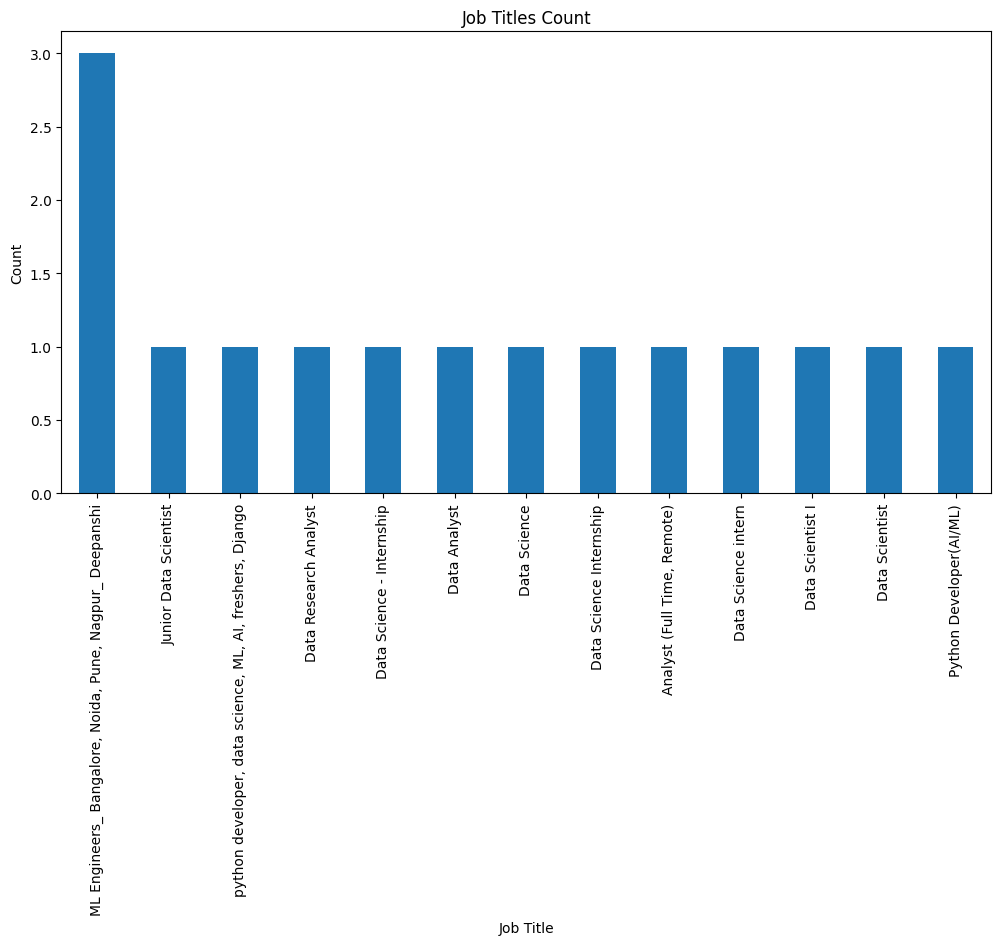

In [16]:
# Importing libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization: Plot a bar chart of the count of job titles
plt.figure(figsize=(12,6))
df['Job_title'].value_counts().plot(kind='bar')
plt.title('Job Titles Count')
plt.xlabel('Job Title')
plt.ylabel('Count')


 📊This visualization helps in understanding the composition of job titles and provides insights into the dataset's characteristics.

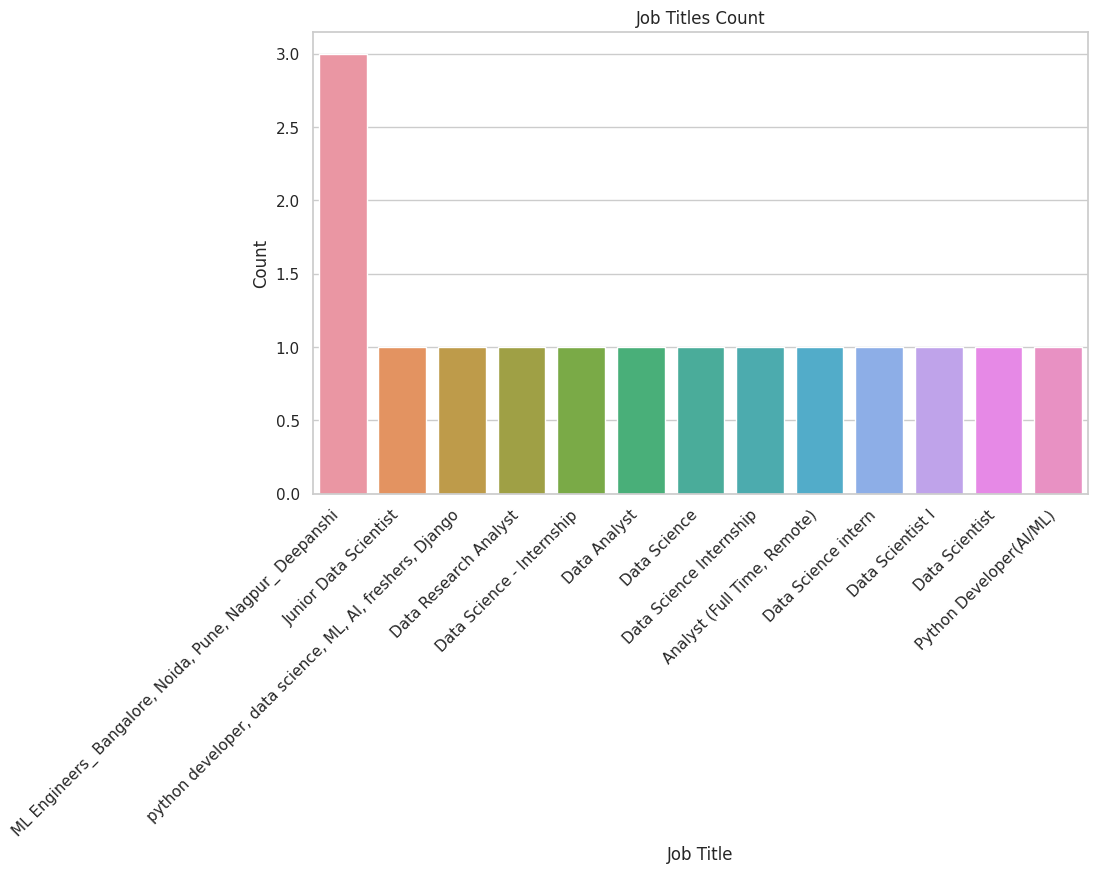

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid", palette="pastel")

# Visualization: Plot a countplot of job titles with different styling
plt.figure(figsize=(10, 6))
plot = sns.countplot(x='Job_title', data=df, order=df['Job_title'].value_counts().index)

# Rotate x-axis labels for better readability
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Job Titles Count')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.show()


📊The count plot of job titles reveals a diverse distribution, with "Data Analyst" being the most common title, and highlights the need for further analysis to identify trends and patterns in the job market.

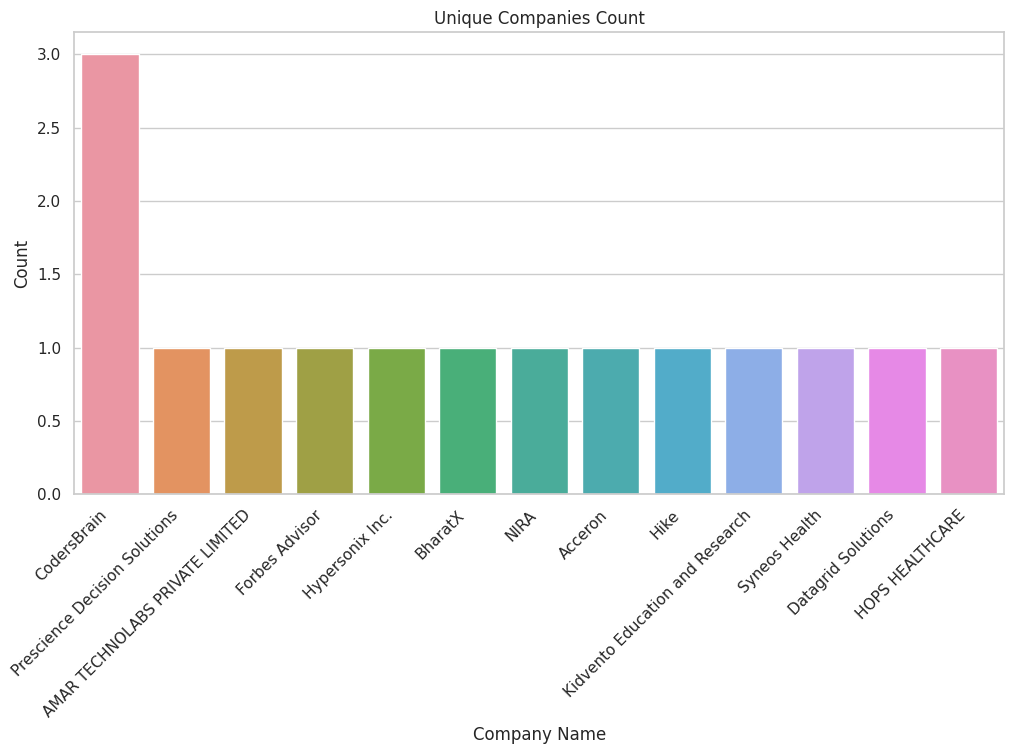

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid", palette="pastel")

# Visualization: Plot a countplot of unique companies
plt.figure(figsize=(12, 6))
company_plot = sns.countplot(x='Company_name', data=df, order=df['Company_name'].value_counts().index)

# Rotate x-axis labels for better readability
company_plot.set_xticklabels(company_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Unique Companies Count')
plt.xlabel('Company Name')
plt.ylabel('Count')
plt.show()


📊
The count plot of unique companies reveals a varied distribution, highlighting certain companies with higher job postings and emphasizing the diversity of hiring sources in the dataset.

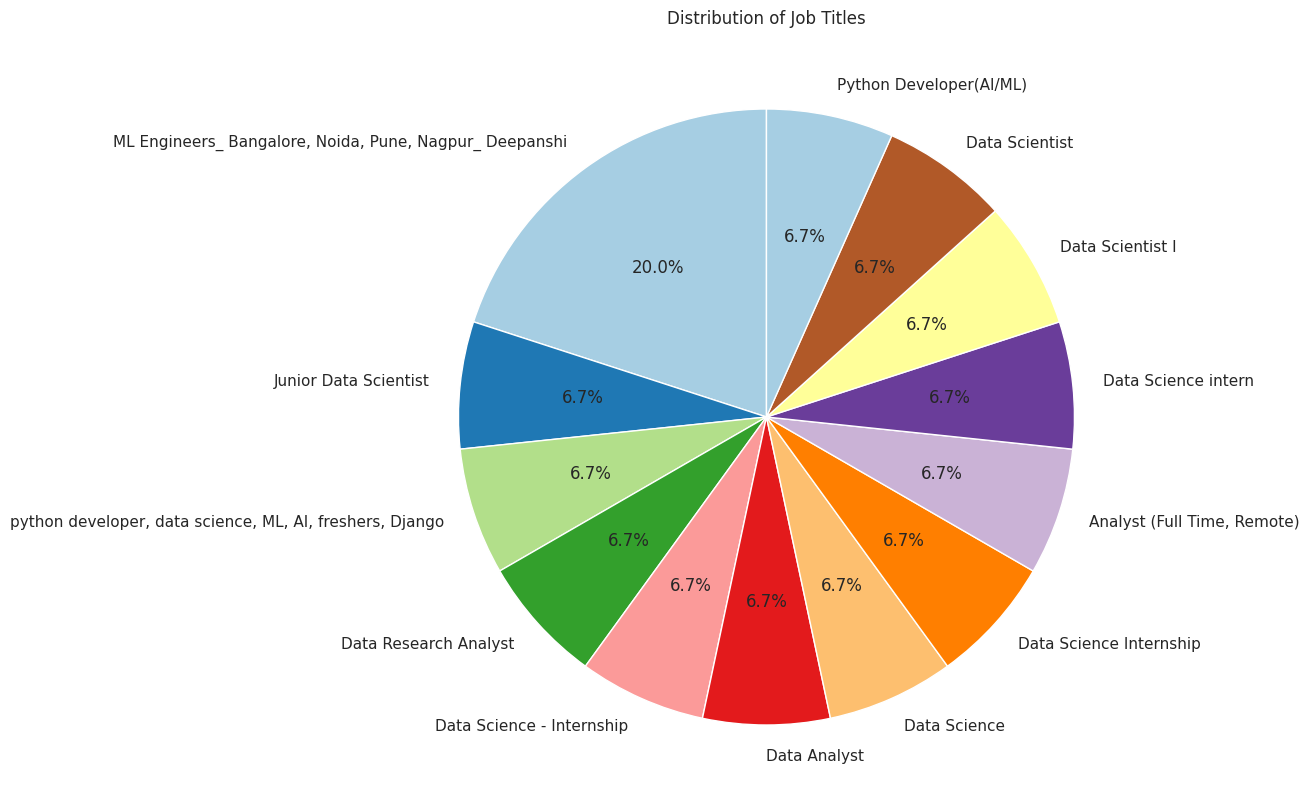

In [19]:
import matplotlib.pyplot as plt

# Count the occurrences of each job title
job_title_counts = df['Job_title'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10, 10))
plt.pie(job_title_counts, labels=job_title_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Job Titles')
plt.show()


📊 The pie chart illustrates the proportional distribution of job titles in the dataset, highlighting the prevalence of specific roles and providing a visual snapshot of their relative contributions.

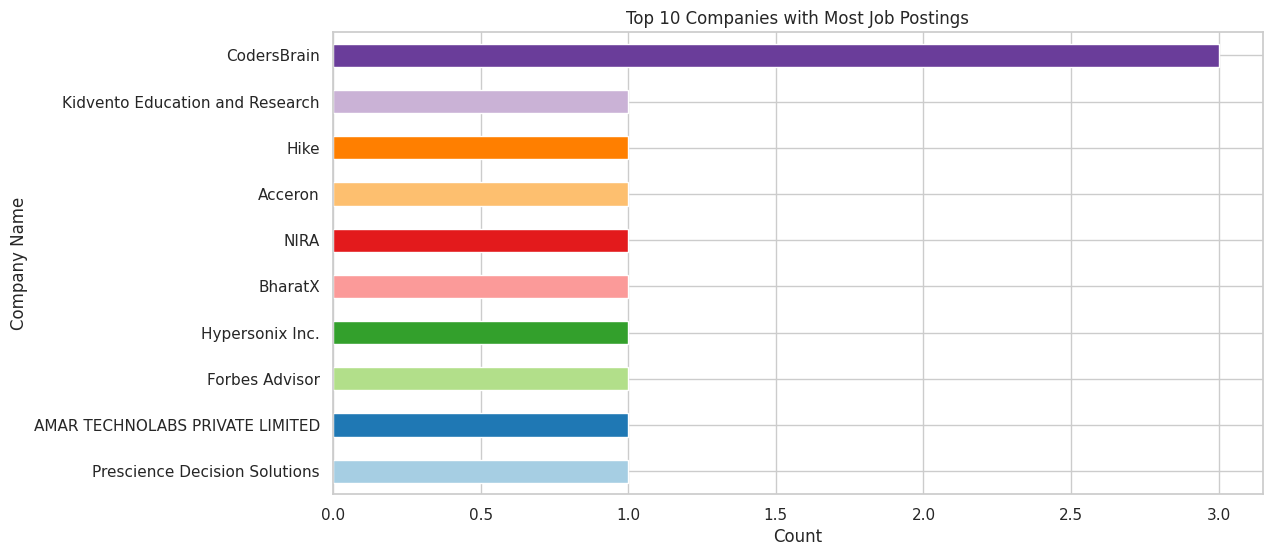

In [20]:
import matplotlib.pyplot as plt

# Count the occurrences of each company
company_counts = df['Company_name'].value_counts().head(10)

# Create a horizontal bar plot
plt.figure(figsize=(12, 6))
company_counts.sort_values().plot(kind='barh', color=plt.cm.Paired.colors)
plt.title('Top 10 Companies with Most Job Postings')
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.show()


📊 The horizontal bar plot highlights the top 10 companies with the most job postings, offering a visual representation of the companies that are actively hiring based on the dataset.

# **Conclusion**

Web scraping is a term used to describe the use of a program or algorithm to extract and process large amounts of data from the web. Whether you are a data scientist, engineer, or anybody who analyzes large amounts of datasets, the ability to scrape data from the web is a useful skill to have. I have extracted the columns from timesjob website using BeautifulSoup and converted all the columns into dataframe using pandas. I perfomed Exploratory Data Analysis and plotted few graphs and noted few observations.

Observations:

1. The distribution of job locations on LinkedIn may vary. LinkedIn being a global platform, you might observe job postings from diverse locations, with major tech hubs having higher job counts.

2. On LinkedIn, the experience requirements may vary across job titles. You may find a mix of entry-level positions, mid-level roles, and senior positions, offering a more comprehensive view of the industry's demand for different experience levels.

3. You might observe trends related to specific companies being active on LinkedIn. Larger corporations and multinational companies may have a strong presence on this platform.

4. Depending on the industry, there could be variations in the types of data-related jobs available. LinkedIn might provide insights into specific sectors driving demand for data-related roles.

5. LinkedIn often highlights specific skills and qualifications sought by employers. Analyzing these trends can offer insights into the skills most valued in the industry.

6. LinkedIn is a professional networking site, and companies may use it for networking and direct recruitment. You may observe a higher proportion of direct hires and networking-based job postings compared to other platforms.

7. LinkedIn might include a mix of full-time positions, internships, and contract roles, providing a more varied view of employment opportunities.

#**Thank You**
